## Titanic survived Project

Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



Dataset Link

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

C:\Users\Sank\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Collection

In [2]:
Titanic_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
Titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Observation:
            1. Label (i.e. Survived) contains classification data so this is a Classification Problem.

## Exploratory Data Analysis

In [3]:
Titanic_df.shape  # 12 columns

(891, 12)

## Drop Column not needed

In [4]:
# 'PassengerId' and 'Name' column not needed for prediction of survival

Titanic_df.drop(["PassengerId", 'Name'], axis = 1, inplace = True)
Titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Titanic_df.shape   # 10 columns

(891, 10)

In [6]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Observation:
            1. Null values found in 'Age', 'Cabin' and 'Embarked'

In [7]:
Titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Observation:
            1. Null values found in 'Age' - 177, 'Cabin' - 687 and 'Embarked' - 02 null values.
            2. Out of 891 only 204 values we have in 'Cabin' column so we can decide to reomve this 
               column as this will not help in giving good performance in the model.

## Drop still more column not needed

In [8]:
# 'Cabin' column not needed for prediction of survival as we have only 204 values 

Titanic_df.drop("Cabin", axis = 1, inplace = True)
Titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [9]:
# 'Ticket' column not needed for prediction of survival 

Titanic_df.drop("Ticket", axis = 1, inplace = True)
Titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
Titanic_df.shape   # 8 columns

(891, 8)

In [11]:
Titanic_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Handle Null values

In [12]:
# 'Age' NaN values index print

Titanic_df[Titanic_df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


Observation:
            1. We can see there is 177 rows with NaN values in 'Age' column

In [13]:
# to replace null values - use mean of 'Age' column which is continuous

np.mean(Titanic_df['Age'])

29.69911764705882

In [14]:
# 'Age' are replaced with mean values 29.69911764705882

Titanic_df['Age'] = Titanic_df['Age'].fillna(Titanic_df['Age'].mean())

In [15]:
# in row 5: we can view 'Age' column replacement with mean value - 29.699118

Titanic_df.iloc[5,:]

Survived            0
Pclass              3
Sex              male
Age         29.699118
SibSp               0
Parch               0
Fare           8.4583
Embarked            Q
Name: 5, dtype: object

In [16]:
# 'Age' NaN values index print - but all NaN values are replaced 

Titanic_df[Titanic_df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [17]:
Titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Observation:
            1. We can see there is no NaN values in 'Age' column it is replaced with 29.699118 value

In [18]:
# 'Embarked' NaN values index print

Titanic_df[Titanic_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [19]:
# For categorical data 'Embarked' take mode and not mean

Titanic_df['Embarked'] = Titanic_df['Embarked'].fillna(Titanic_df['Embarked'].mode()[0])

In [20]:
# in row 61: we can view 'Embarked' column replacement with mode value 

Titanic_df.iloc[61,:]

Survived         1
Pclass           1
Sex         female
Age           38.0
SibSp            0
Parch            0
Fare          80.0
Embarked         S
Name: 61, dtype: object

In [21]:
Titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Observation:
            1. We can see there is no NaN values in 'Embarked' column it is replaced with mode value
            2. All Null values are handled

## check for any blank records

In [22]:
Titanic_df.loc[Titanic_df['Embarked'] == ' ']   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


Observation: 
            1. checked all 9 columns but none have any blank values

## check the duplicate values in rows

In [23]:
Titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [24]:
Titanic_df.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [25]:
Titanic_df.shape

(891, 8)

In [26]:
Titanic_df.duplicated().sum()

111

In [27]:
# remove 111 duplicate values in rows

Titanic_df.drop_duplicates(ignore_index = True, inplace = True)

Observation:
            1. Almost 15 duplicate values in rows we found and so deleted 

In [28]:
Titanic_df.shape

(780, 8)

In [29]:
Titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
775,0,3,female,39.000000,0,5,29.1250,Q
776,1,1,female,19.000000,0,0,30.0000,S
777,0,3,female,29.699118,1,2,23.4500,S
778,1,1,male,26.000000,0,0,30.0000,C


## Number of uniques values in each column 

In [31]:
Titanic_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,248
Embarked,3


In [32]:
Titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
775,0,3,female,39.000000,0,5,29.1250,Q
776,1,1,female,19.000000,0,0,30.0000,S
777,0,3,female,29.699118,1,2,23.4500,S
778,1,1,male,26.000000,0,0,30.0000,C


In [33]:
Titanic_df.sample(n = 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
609,1,1,male,31.000000,1,0,57.0000,S
167,0,3,male,29.699118,3,1,25.4667,S
751,1,3,female,18.000000,0,1,9.3500,S
775,0,3,female,39.000000,0,5,29.1250,Q
502,0,2,male,28.000000,0,0,13.5000,S


In [34]:
Titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. Looks like there are quite more number of outliers
            4. There is high Standard deviation value for 'Fare' column compared to mean, there might 
               be skewness.

In [35]:
Titanic_df.shape

(780, 8)

## Data Visualization

In [36]:
# seperating numerical and categorical columns

cat_col = []
for i in Titanic_df.dtypes.index:
    if Titanic_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in Titanic_df.dtypes.index:
    if Titanic_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Sex', 'Embarked']


Numerical Column ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


0    458
1    322
Name: Survived, dtype: int64


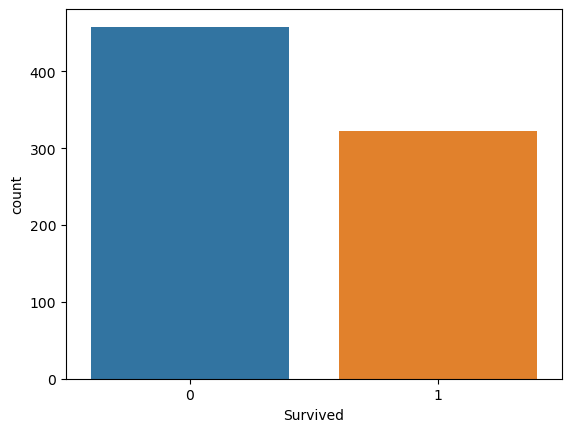

In [37]:
# Univariate Analysis

sns.countplot(x = 'Survived', data = Titanic_df)
print(Titanic_df.Survived.value_counts())

Observations:
            1. out of 780 passengers - 458 not survived and 322 survived

male      488
female    292
Name: Sex, dtype: int64


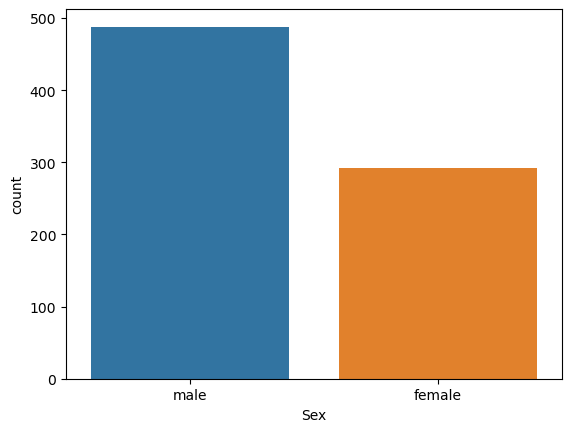

In [38]:
# Univariate Analysis

sns.countplot(x = 'Sex', data = Titanic_df)
print(Titanic_df.Sex.value_counts())

Observation:
            1. There are more number of male passengers compared to female passengers

0    458
1    322
Name: Survived, dtype: int64


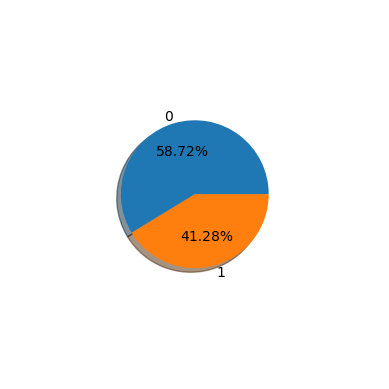

In [39]:
# Univariate Analysis

label = '0', '1'
plt.pie(Titanic_df['Survived'].value_counts(), labels = label, radius = 0.5, autopct = '%1.2f%%', shadow = True)
print(Titanic_df.Survived.value_counts())

Observation:
            1. Class '0' has 58.72% and Class '1' has 41.28%
            2. Hence, Classes are balanced.

S    567
C    155
Q     58
Name: Embarked, dtype: int64


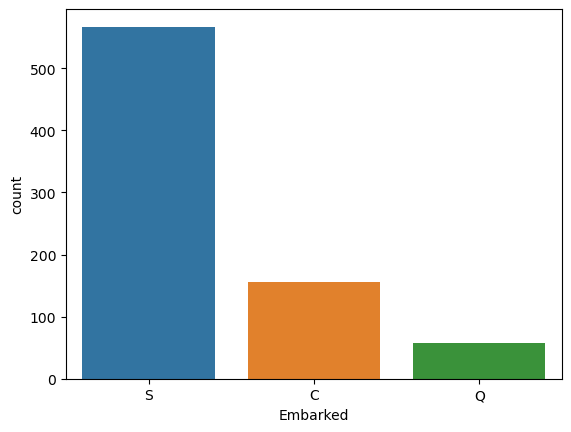

In [40]:
# Univariate Analysis

sns.countplot(x = 'Embarked', data = Titanic_df)
print(Titanic_df.Embarked.value_counts())

In [ ]:
Observation:
            1. There were more number of S - Southampton 'Embarked' passengers compared to others

0    576
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


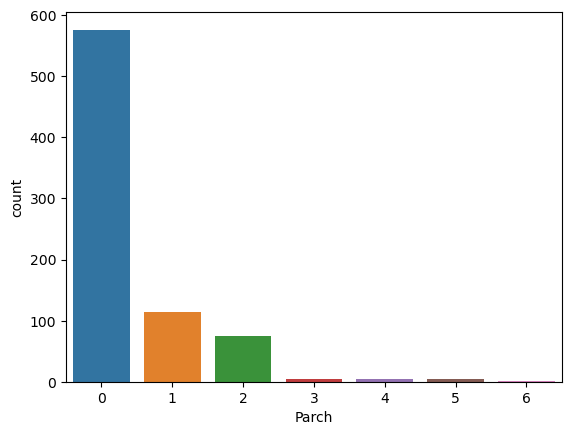

In [41]:
# Univariate Analysis

sns.countplot(x = 'Parch', data = Titanic_df)
print(Titanic_df.Parch.value_counts())

0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


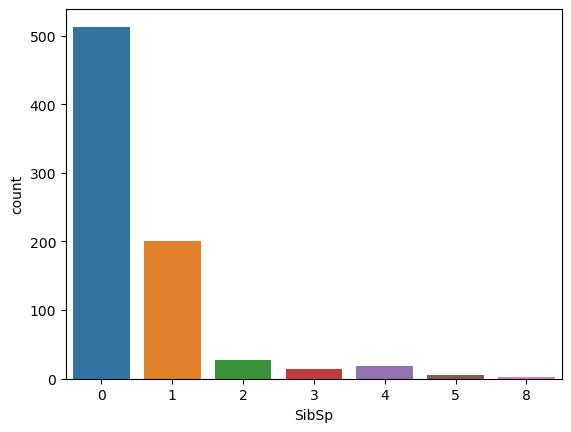

In [42]:
# Univariate Analysis

sns.countplot(x = 'SibSp', data = Titanic_df)
print(Titanic_df.SibSp.value_counts())

<AxesSubplot:xlabel='Survived', ylabel='Age'>

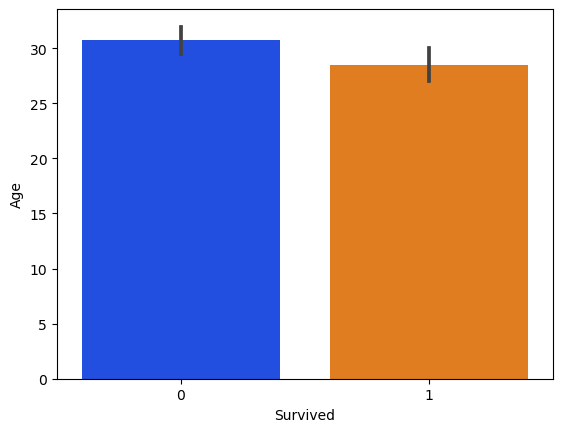

In [43]:
# plot 'Survived' v/s 'Age'

sns.barplot(x = 'Survived', y = 'Age', data = Titanic_df, palette = 'bright')

Observation:
            1. More number of 28 years age group passengers survived compared to others.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

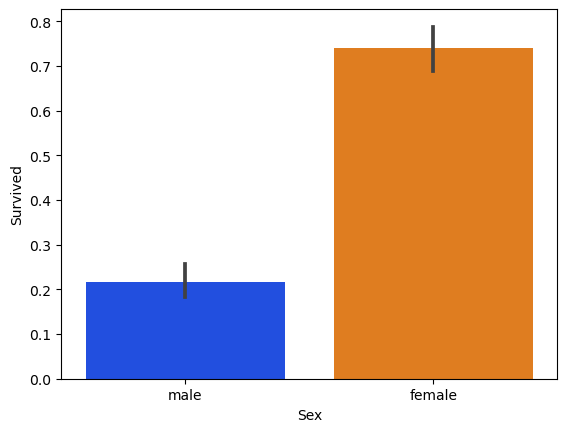

In [44]:
# plot 'Sex' v/s 'Survived'

sns.barplot(x = 'Sex', y = 'Survived', data = Titanic_df, palette = 'bright')

In [ ]:
Observation:
            1. More number of female passengers survived compared to male.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

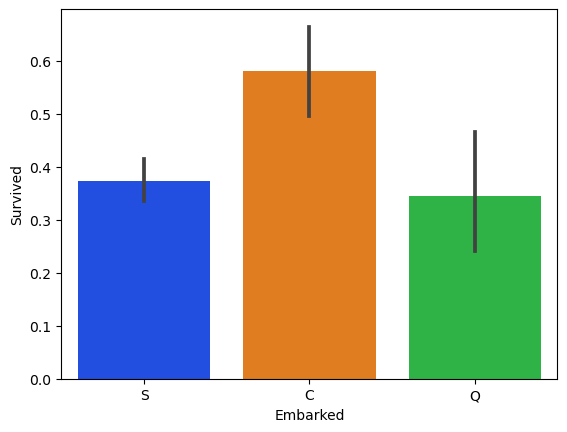

In [45]:
# plot 'Embarked' v/s 'Survived'

sns.barplot(x = 'Embarked', y = 'Survived', data = Titanic_df, palette = 'bright')

Observation:
            1. More number of C - Cherbourg passengers survived compared to others.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

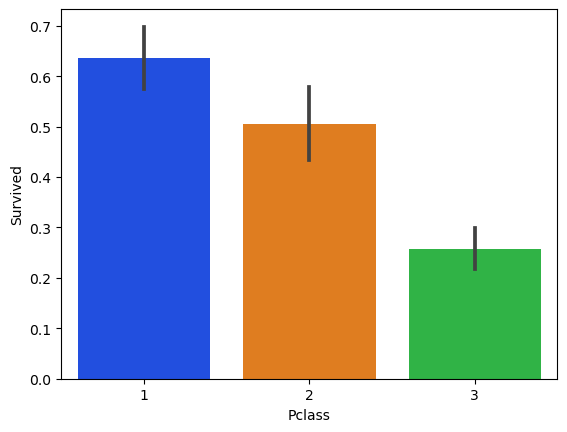

In [46]:
# plot 'Pclass' v/s 'Survived'

sns.barplot(x = 'Pclass', y = 'Survived', data = Titanic_df, palette = 'bright')

Observation:
            1. More number of passenger class Pclass - 1 survived compared to Pclass 2 and Pclass 3.

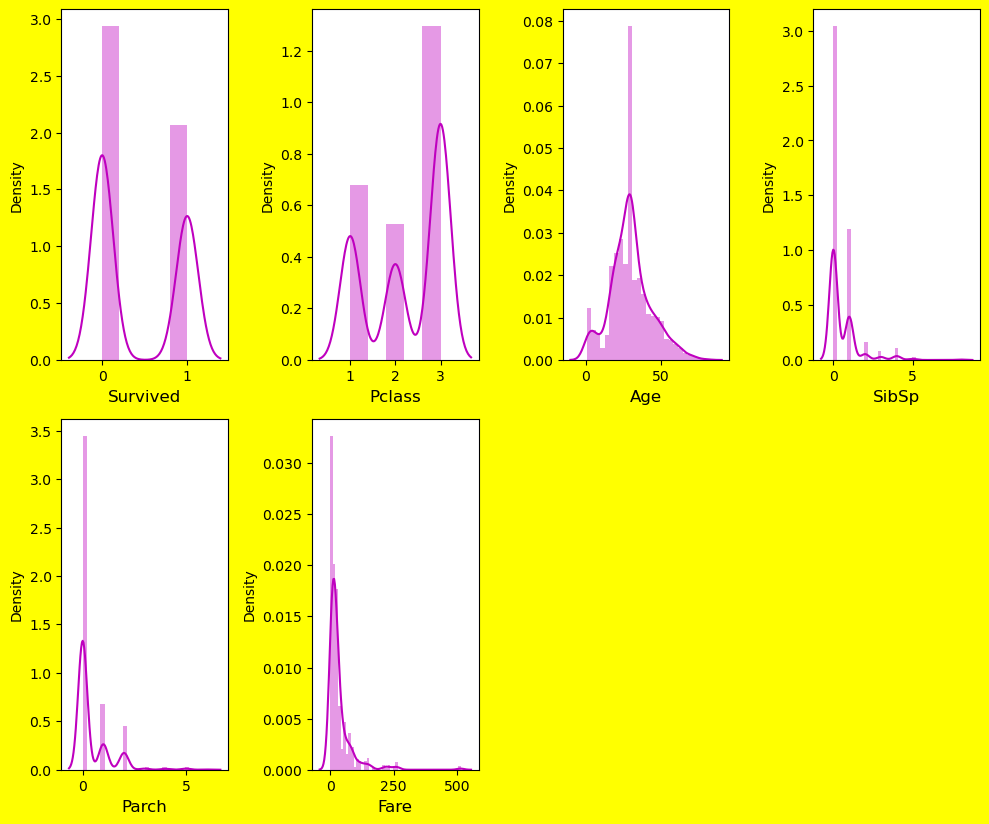

In [47]:
# lets see how data is distributed for every column

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in num_col:
    if p <= 12:
        ax = plt.subplot(3, 4, p)
        sns.distplot(Titanic_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observation:
        1. There are lot of outliers - Looks like we should also deal with outliers
        2. We need to deal with skewness in the data - most of the variables right skewness are there 

In [48]:
Titanic_df.shape

(780, 8)

## Check for Multicollinearity

## Data Correlation find - whether we need all 8 columns

In [49]:
# get coefficient of one variable with all the other variables

cor = Titanic_df.corr()
cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336244,-0.079192,-0.037597,0.069669,0.246669
Pclass,-0.336244,1.000000,-0.338528,0.086788,0.038975,-0.552440
Age,-0.079192,-0.338528,1.000000,-0.280010,-0.186999,0.090555
SibSp,-0.037597,0.086788,-0.280010,1.000000,0.380596,0.134127
Parch,0.069669,0.038975,-0.186999,0.380596,1.000000,0.191055
Fare,0.246669,-0.552440,0.090555,0.134127,0.191055,1.000000


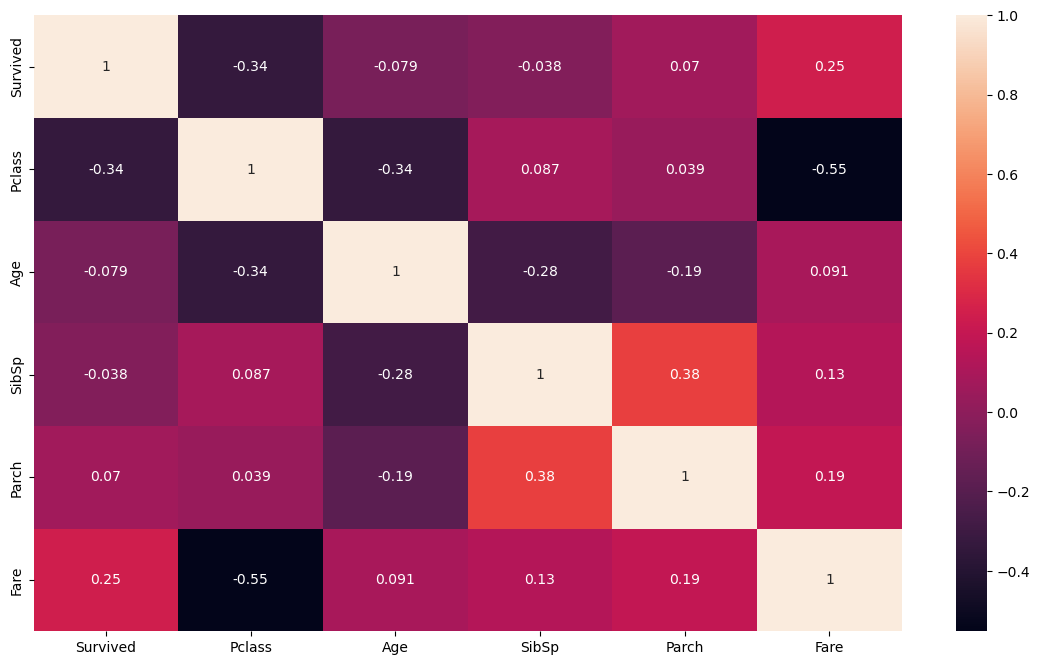

In [50]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s feature - 'Parch' v/s 'SibSp' has positive correlation 0.38
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

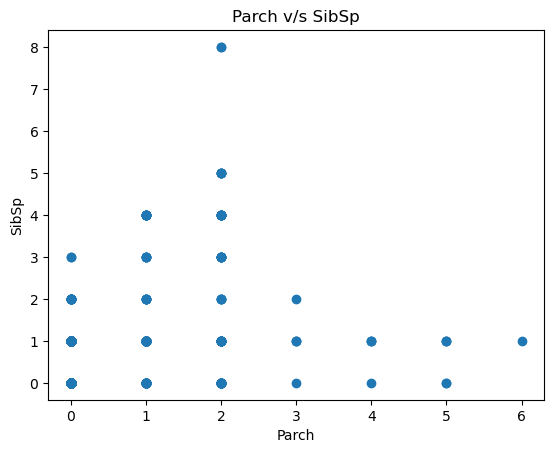

In [51]:
# one more proof so will plot scatter plot and check

plt.scatter(Titanic_df['Parch'], Titanic_df.SibSp)
plt.xlabel("Parch")
plt.ylabel("SibSp")
plt.title("Parch v/s SibSp")
plt.show()

Observation:
            1. There is no multicollinearity issue

In [52]:
# correlation of all features with the target column - 'Survived'

cor['Survived'].sort_values(ascending = False)   

Survived    1.000000
Fare        0.246669
Parch       0.069669
SibSp      -0.037597
Age        -0.079192
Pclass     -0.336244
Name: Survived, dtype: float64

## Feature Encoding

## Change the categorical value into numbers, as ML model will not understand 'male' or 'female'

In [53]:
Titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [54]:
# Ordinal Encoding

# ML model wil not understand 'male' or 'female' so replace with 0 and 1

Titanic_df['Sex'] = Titanic_df['Sex'].replace({'female' : 1, 'male' : 0})

In [55]:
Titanic_df['Sex'].unique()

array([0, 1], dtype=int64)

In [56]:
Titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [57]:
# One Hot Encoding

# ML model wil not understand C = Cherbourg; Q = Queenstown; S = Southampton so replace with 0/1/2

Embarked = pd.get_dummies(Titanic_df.Embarked, prefix = 'Embarked')
Titanic_df = pd.concat([Titanic_df, Embarked], axis = 1)


In [58]:
Titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [59]:
Titanic_df.drop(columns = 'Embarked', inplace = True)

In [60]:
Titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Seperating Features and Target

In [61]:
Titanic_df.shape

(780, 10)

In [62]:
x = Titanic_df.drop(columns = ['Survived'])
y = Titanic_df['Survived']

In [63]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
775,3,1,39.000000,0,5,29.1250,0,1,0
776,1,1,19.000000,0,0,30.0000,0,0,1
777,3,1,29.699118,1,2,23.4500,0,0,1
778,1,0,26.000000,0,0,30.0000,1,0,0


In [64]:
y

0      0
1      1
2      1
3      1
4      0
      ..
775    0
776    1
777    0
778    1
779    0
Name: Survived, Length: 780, dtype: int64

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [65]:
x1 = Titanic_df.drop(columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S'])
x1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
775,0,3,1,39.000000,0,5,29.1250
776,1,1,1,19.000000,0,0,30.0000
777,0,3,1,29.699118,1,2,23.4500
778,1,1,0,26.000000,0,0,30.0000


In [66]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-0.83848481,  0.88282317, -0.77353775, ...,  0.48040606,
        -0.49874622, -0.52803267],
       [ 1.19262746, -1.45936076,  1.29276172, ...,  0.48040606,
        -0.49874622,  0.69795603],
       [ 1.19262746,  0.88282317,  1.29276172, ..., -0.53234185,
        -0.49874622, -0.51510904],
       ...,
       [-0.83848481,  0.88282317,  1.29276172, ...,  0.48040606,
         1.88789212, -0.21786566],
       [ 1.19262746, -1.45936076, -0.77353775, ..., -0.53234185,
        -0.49874622, -0.09245863],
       [-0.83848481,  0.88282317, -0.77353775, ..., -0.53234185,
        -0.49874622, -0.51845961]])

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x1.columns
vif

,VIF Values,Features
0,1.590205,Survived
1,1.840982,Pclass
2,1.447981,Sex
3,1.292566,Age
4,1.269021,SibSp
5,1.272719,Parch
6,1.580316,Fare


In [ ]:
Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe all features are within the threshold value=5. 
               so there is no multicollinearity problem. 

## Checking Outliers

In [68]:
# we dont check outliers for labels - so remove the label

x2 = Titanic_df.drop(columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch'])
x2

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,0,1
1,38.000000,71.2833,1,0,0
2,26.000000,7.9250,0,0,1
3,35.000000,53.1000,0,0,1
4,35.000000,8.0500,0,0,1
...,...,...,...,...,...
775,39.000000,29.1250,0,1,0
776,19.000000,30.0000,0,0,1
777,29.699118,23.4500,0,0,1
778,26.000000,30.0000,1,0,0


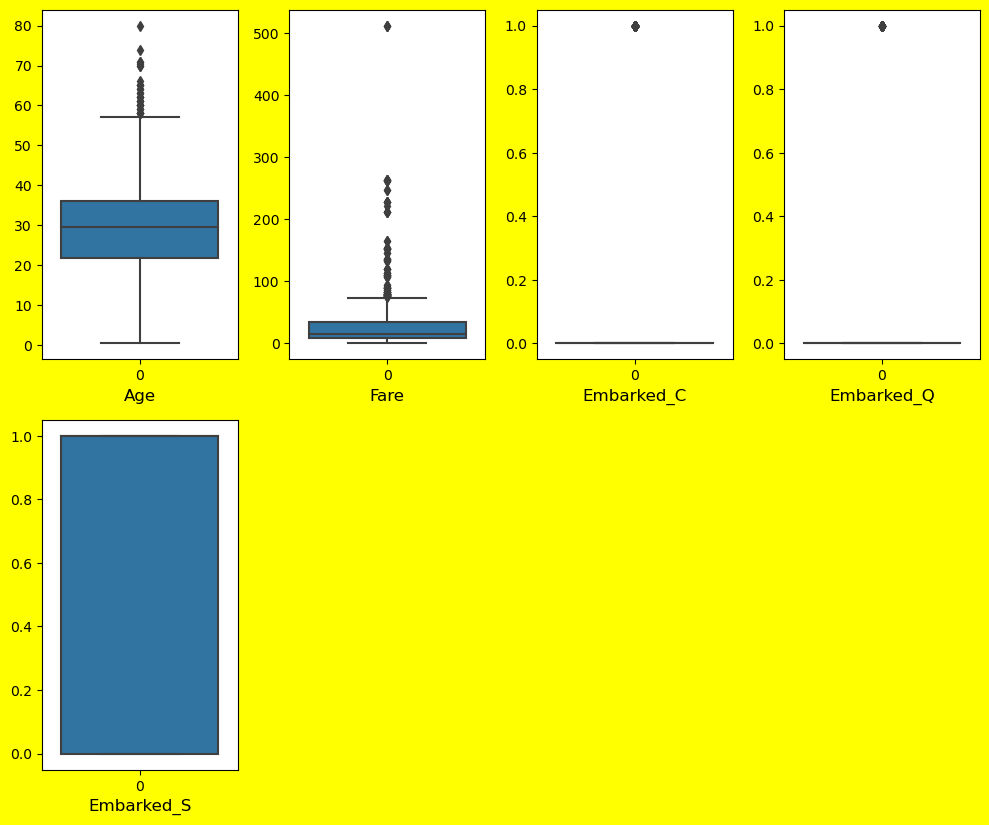

In [69]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in x2:
    if p <= 9:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = x2[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [ ]:
observations:
            1. More Outliers found in features - 'Age', 'Fare'. The outliers are right skewed 
                (i.e. outliers are above max value)
            2. Remove the outliers

## Find IQR to identify outliers and remove it

In [71]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = Titanic_df.quantile(0.25)
q3 = Titanic_df.quantile(0.75)
iqr = q3 - q1

In [72]:
# validating one outlier

Age_high = (q3['Age'] + (1.5 * iqr['Age']))
Age_high

# anything > 57.375 outliers

57.375

In [74]:
# check the index which have the higher values

np_index = np.where(Titanic_df['Age'] > Age_high)
np_index

# remove these indexes as they are outliers

(array([ 11,  33,  53,  90,  91, 110, 162, 186, 218, 237, 252, 258, 263,
        303, 336, 397, 414, 435, 438, 442, 487, 507, 523, 554, 559, 580,
        592, 603, 612, 656, 730, 747], dtype=int64),)

In [76]:
Titanic_df.shape

(780, 10)

In [77]:
Titanic_df = Titanic_df.drop(Titanic_df.index[np_index])

In [79]:
Titanic_df.shape  # 32 rows removed - outliers

(748, 10)

In [80]:
Titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
775,0,3,1,39.000000,0,5,29.1250,0,1,0
776,1,1,1,19.000000,0,0,30.0000,0,0,1
777,0,3,1,29.699118,1,2,23.4500,0,0,1
778,1,1,0,26.000000,0,0,30.0000,1,0,0


In [81]:
Titanic_df.reset_index(inplace = True, drop = True)

In [82]:
Titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
743,0,3,1,39.000000,0,5,29.1250,0,1,0
744,1,1,1,19.000000,0,0,30.0000,0,0,1
745,0,3,1,29.699118,1,2,23.4500,0,0,1
746,1,1,0,26.000000,0,0,30.0000,1,0,0


In [84]:
# validating another outlier

Fare_high = (q3['Fare'] + (1.5 * iqr['Fare']))
Fare_high

# anything > 73.8625 outliers

73.8625

In [85]:
# check the index which have the higher values

np_index1 = np.where(Titanic_df['Fare'] > Fare_high)
np_index1

# remove these indexes as they are outliers

(array([ 26,  30,  32,  49,  57,  58,  81,  91, 106, 111, 125, 194, 197,
        202, 208, 221, 231, 232, 233, 236, 242, 260, 261, 266, 268, 272,
        273, 274, 277, 278, 284, 285, 289, 295, 297, 299, 303, 327, 329,
        331, 334, 342, 345, 362, 379, 388, 396, 418, 419, 424, 426, 431,
        432, 446, 450, 459, 466, 471, 477, 478, 495, 499, 502, 518, 532,
        544, 555, 571, 573, 580, 586, 588, 596, 603, 617, 621, 623, 624,
        638, 641, 643, 655, 665, 675, 691, 704, 714, 720, 738], dtype=int64),)

In [86]:
Titanic_df.shape

(748, 10)

In [87]:
Titanic_df = Titanic_df.drop(Titanic_df.index[np_index1])

In [88]:
Titanic_df.shape  # 89 rows removed - outliers

(659, 10)

In [89]:
Titanic_df.reset_index(inplace = True, drop = True)

In [90]:
Titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
654,0,3,1,39.000000,0,5,29.1250,0,1,0
655,1,1,1,19.000000,0,0,30.0000,0,0,1
656,0,3,1,29.699118,1,2,23.4500,0,0,1
657,1,1,0,26.000000,0,0,30.0000,1,0,0


## Checking for Skewness

In [96]:
Titanic_df.skew() # not in the range -0.5 to +0.5

Survived      0.538601
Pclass       -0.945139
Sex           0.649053
Age          -0.069172
SibSp         0.966351
Parch         2.820994
Fare          1.469245
Embarked_C    1.913260
Embarked_Q    3.055395
Embarked_S   -1.241576
dtype: float64

In [97]:
# removing for skewness

Titanic_df['SibSp'] = np.cbrt(Titanic_df['SibSp'])

In [98]:
Titanic_df['Parch'] = np.cbrt(Titanic_df['Parch'])

Titanic_df['Fare'] = np.cbrt(Titanic_df['Fare'])

In [99]:
Titanic_df.skew()

Survived      0.538601
Pclass       -0.945139
Sex           0.649053
Age          -0.069172
SibSp         0.769383
Parch         1.309789
Fare         -0.027012
Embarked_C    1.913260
Embarked_Q    3.055395
Embarked_S   -1.241576
dtype: float64

In [ ]:
Observation:
            1. 'SibSp' and 'Parch' are litte more than +0.5
            2. Almost all other features - there is no skewness
            3. Ignore categorical column and Label column

## Modelling

In [100]:
Titanic_df.shape

(659, 10)

In [101]:
x.shape

(780, 9)

In [102]:
y.shape

(780,)

In [103]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 41)

In [104]:
# Function to check accuracy of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train == True:
        y_pred = clf.predict(x_train)
        print("Train Result ")
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100 : .2f}%')
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result ")
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100 : .2f}%')
        print("Test Classification Report \n", classification_report(y_test, pred, digits = 2))

In [105]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [106]:
# This is the training score

metric_score(dt, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  98.29%


In [107]:
# This is the testing score

metric_score(dt, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  75.38%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       112
           1       0.73      0.66      0.70        83

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195



Observation:
            1. Training Accuracy - 98.29%
            2. Testing Accuracy - 75.38% 
            3. We can try to improve the testing accuracy

In [108]:
# to check the confusion matrix

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 20],
       [28, 55]], dtype=int64)

## Hypertuning Parameters

In [109]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(10, 15), 'min_samples_leaf': range(2, 6), 'min_samples_split': range(3, 8), 'max_leaf_nodes': range(5, 40)}

In [110]:
gridsearch = GridSearchCV(estimator = dt, param_grid = parameters, cv = 5, n_jobs = -1)

In [111]:
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 40),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [112]:
best_parameters = gridsearch.best_params_

In [113]:
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


## Again Retrain the model with hyper-tuned parameters 

In [114]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 6, min_samples_leaf = 2, min_samples_split = 3)

In [115]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=3)

In [117]:
# This is the training score after hyperparameter tuning

metric_score(dt_model, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  81.03%


In [118]:
# This is the testing score after hyperparameter tuning

metric_score(dt_model, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  81.03%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.82      0.71      0.76        83

    accuracy                           0.81       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.81      0.81      0.81       195



In [ ]:
Observation:
            1. Training Accuracy - 81.03%
            2. Testing Accuracy - 81.03% we have tried to improve the testing accuracy

## Plot ROC curve and AUC value

In [119]:
pred = dt_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.8102564102564103


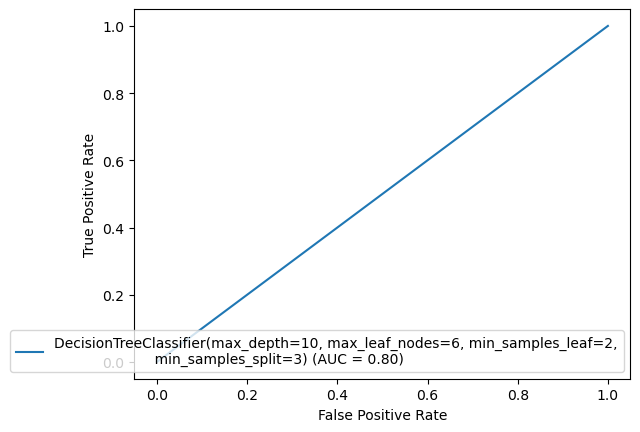

In [120]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
roc_curve = metrics.RocCurveDisplay(fpr = tpr, tpr = tpr, roc_auc = roc_auc, estimator_name = dt_model)
roc_curve.plot()

## Save the Model

In [122]:
import pickle
pickle.dump(dt_model, open('Titanic_model.pkl', 'wb'))

## prediction using the saved model

In [123]:
loaded_model = pickle.load(open('Titanic_model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [124]:
print(y_test)

332    0
778    1
143    1
699    0
20     0
      ..
296    0
673    1
624    1
167    0
44     1
Name: Survived, Length: 195, dtype: int64


In [126]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
190,0,0
191,1,1
192,0,1
193,0,0


Observation:
            1. Almost actual and predicted values match
            2. This Titanic_model.pkl can be used to classify whether the arbitrary passenger on 
                Titanic would survive the sinking or not. Survive represents '1' and Not Survive 
                represents '0'